# Avocado Market - Time Series Regression

### by ReDay Zarra

This project utilizes **Facebook Prophet** to analyze time series data for avocados from this dataset. The data includes observation dates, average unit price, unit type, region, volume and more. This time series data will then be used to **predict the prices for avocados** at any given date. This project showcases a 
step-by-step implementation of the model as well as in-depth notes to customize the 
model further for higher accuracy.

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

> Pandas is a library used for data frame manipulations. NumPy is a package used for numerical analysis. Matplotlib and Seaborn are used for data visualization. Random will be used to generate random values. Facebook 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set_style('darkgrid')

## Importing the dataset

Importing the dataset with the .read_csv method from Pandas to load the dataset and storing it in the avocado_df variable. We can take a glimpse at the dataset with the built-in Pandas methods.

In [3]:
avocado_df = pd.read_csv('avocado.csv')

In [4]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Visualizing the dataset

Visualizing the dataset and conducting exploratory data analysis to find patterns and trends from the dataset. I will plot the data on different kinds of plots to compare components of the data that I find interesting.

### Year vs. Average Price

In [5]:
avocado_df = avocado_df.sort_values("Date")

> Using the .sort_values to **sort the dataframe** from the values of the Date column

In [6]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


<Figure size 1500x1500 with 0 Axes>

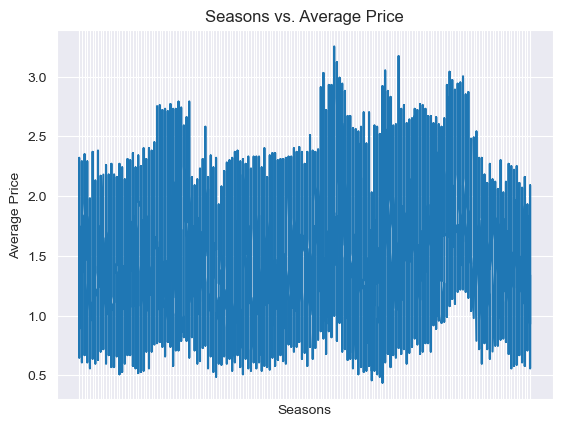

<Figure size 1500x1500 with 0 Axes>

In [7]:
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])
plt.title("Seasons vs. Average Price")
plt.xlabel("Seasons")
plt.ylabel("Average Price")
plt.xticks(visible = False)
plt.figure(figsize = (15, 15))

> Graph of the **average price plotted over the span of time** from 2015-01-04 to 	2018-03-25

### Region vs. Count

<AxesSubplot:xlabel='region', ylabel='count'>

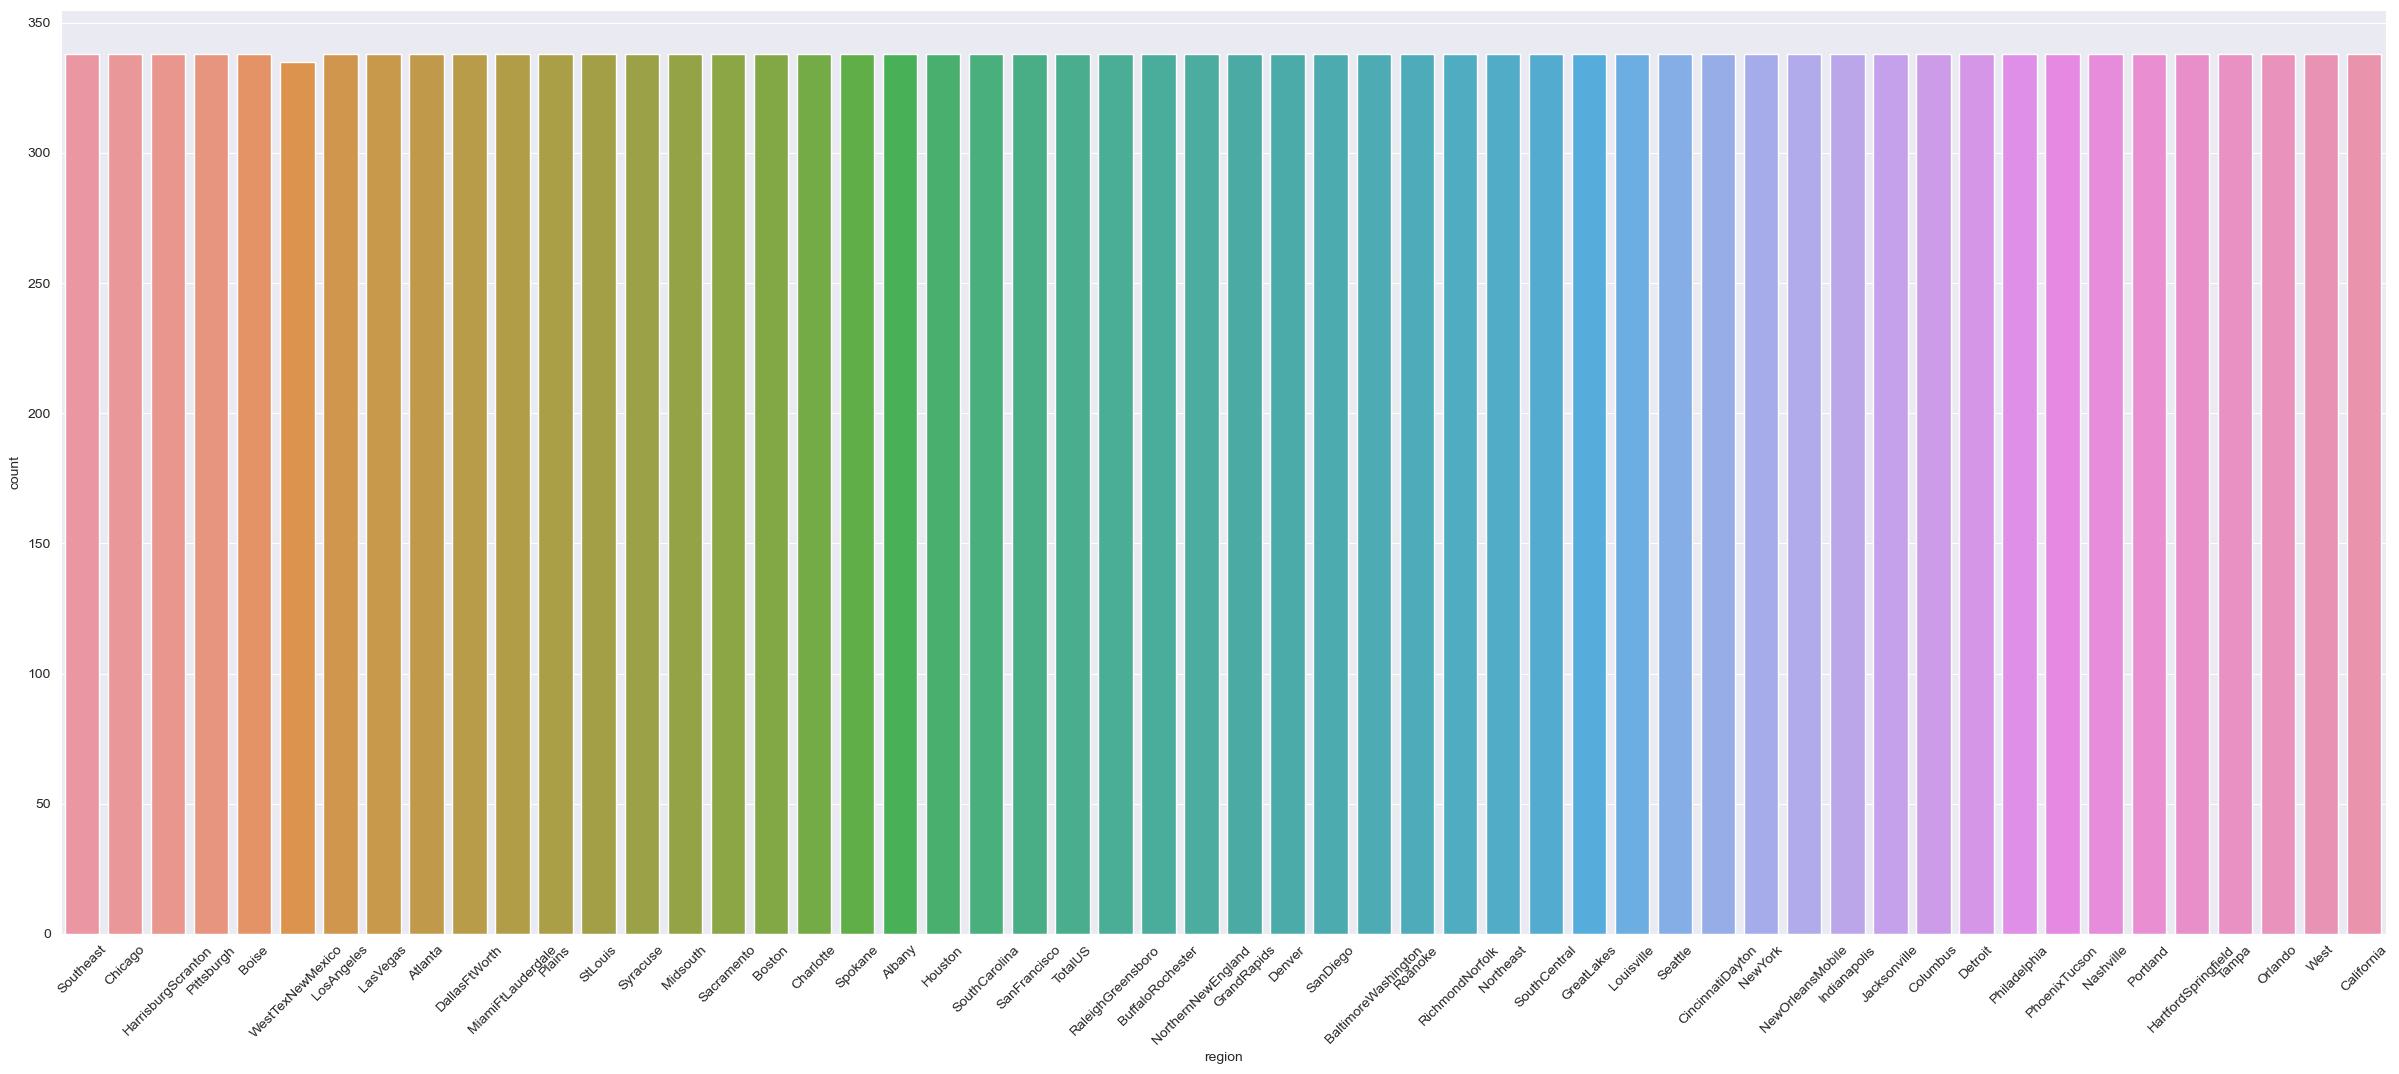

In [8]:
plt.figure(figsize = (30, 12))
plt.xticks(rotation = 45)
sns.countplot(x = 'region', data = avocado_df)

> Plot of **regions and the number of avocados** they consume. 

### Year vs. Count

<AxesSubplot:xlabel='year', ylabel='count'>

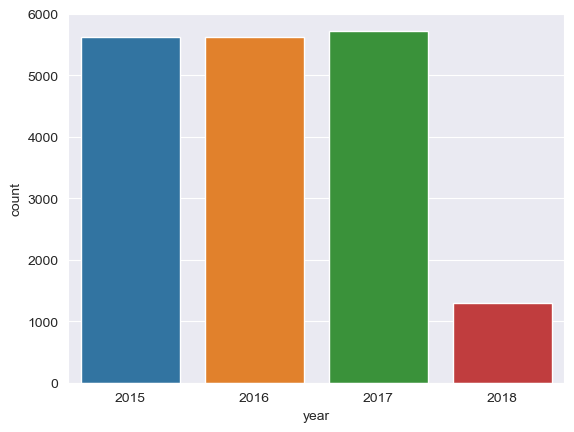

In [9]:
sns.countplot(x = 'year', data = avocado_df)

> Plot of **number of avocados consumed every year**

## Seasonality - Time Series Regression

I will use Facebook Prophet to **predict the average price of each avocado for future seasons**. To do this, I will need to filter the dataframe to only include the data I need and then parse that into Prophet for predictions.

In [10]:
df_prophet = avocado_df[['Date', 'AveragePrice']]

> **Reassign the avocado dataframe** to only include the "Date" and "AveragePrice" columns. These are the only columns we need to perfrom the predictions.

In [11]:
df_prophet = df_prophet.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

> **Rename the columns to "ds" and "y"** because those are the variables that Prophet expects as inputs.

In [12]:
df_prophet

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [14]:
p = Prophet()
p.fit(df_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


> **Initialize Prophet** by calling the Prophet() class then **fit the wanted data** to the class object using the .fit() method

In [15]:
wanted = p.make_future_dataframe(periods = 365)
forecast = p.predict(wanted)

C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


> **Use the .make_future_dataframe() method** with a period of 365 (number of days) to consolidate the data into a 'wanted' variable. **Use the .predict() method to make inferences** on 'wanted' and assign that to a 'forecast' variable.

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496718,0.918809,1.866729,1.496718,1.496718,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,0.0,0.0,0.0,1.383920
1,2015-01-11,1.491718,0.913342,1.891462,1.491718,1.491718,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,0.0,0.0,0.0,1.387427
2,2015-01-18,1.486719,0.882819,1.849511,1.486719,1.486719,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,0.0,0.0,0.0,1.382728
3,2015-01-25,1.481720,0.826420,1.824924,1.481720,1.481720,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,0.0,0.0,0.0,1.358678
4,2015-02-01,1.476721,0.844467,1.777264,1.476721,1.476721,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,0.0,0.0,0.0,1.325199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164538,0.549025,1.607690,0.982069,1.350698,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,0.0,0.0,0.0,1.078120
530,2019-03-22,1.163813,0.560749,1.566334,0.980181,1.350630,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,0.0,0.0,0.0,1.079065
531,2019-03-23,1.163088,0.595463,1.580546,0.977945,1.350562,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,0.0,0.0,0.0,1.080283
532,2019-03-24,1.162363,0.543761,1.635778,0.976321,1.350494,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,0.0,0.0,0.0,1.081756


### Visualizing the Predictions

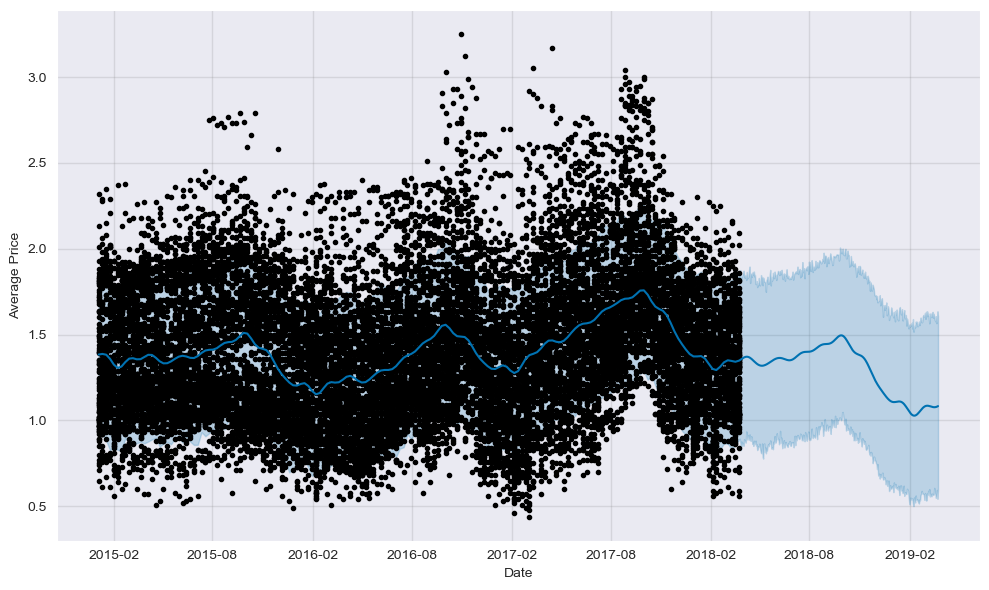

In [17]:
figure = p.plot(forecast, xlabel = 'Date', ylabel = 'Average Price')

> **Graph of future predictions** based on Date and Avergage Price per avocado

C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


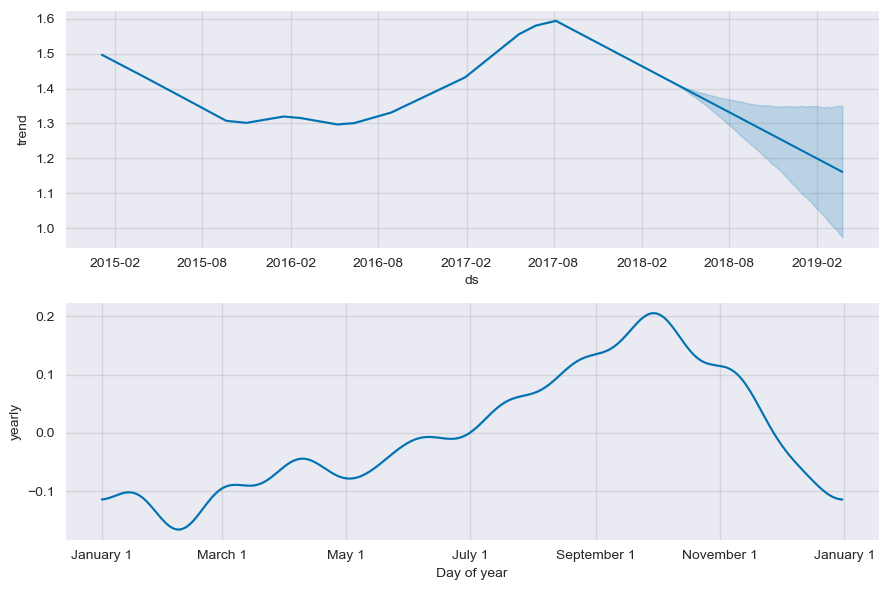

In [18]:
figure = p.plot_components(forecast)

> Plots of the components over time. The **top graph shows the general trend of the Average Price** of avocados as time passes, and the **bottom graph shows the annual trend of the price** of avocados every season. 

## Region Based - Time Series Regression

I will use Facebook Prophet to **predict the average price of each avocado for the Western region**. To do this, I will need to filter the dataframe to only include the data I need and then parse that into Prophet for predictions.

In [19]:
df_prophet = pd.read_csv('avocado.csv')
df_prophet_region = df_prophet[df_prophet['region'] == 'West']

> **Filtering the data based on regions**, specifically regions labelled "West"

In [20]:
df_prophet_region = df_prophet_region.sort_values("Date")
df_prophet_region.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


> Using the .sort_values to **sort the dataframe** from the values of the Date column

### Visualizing Regional Data

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


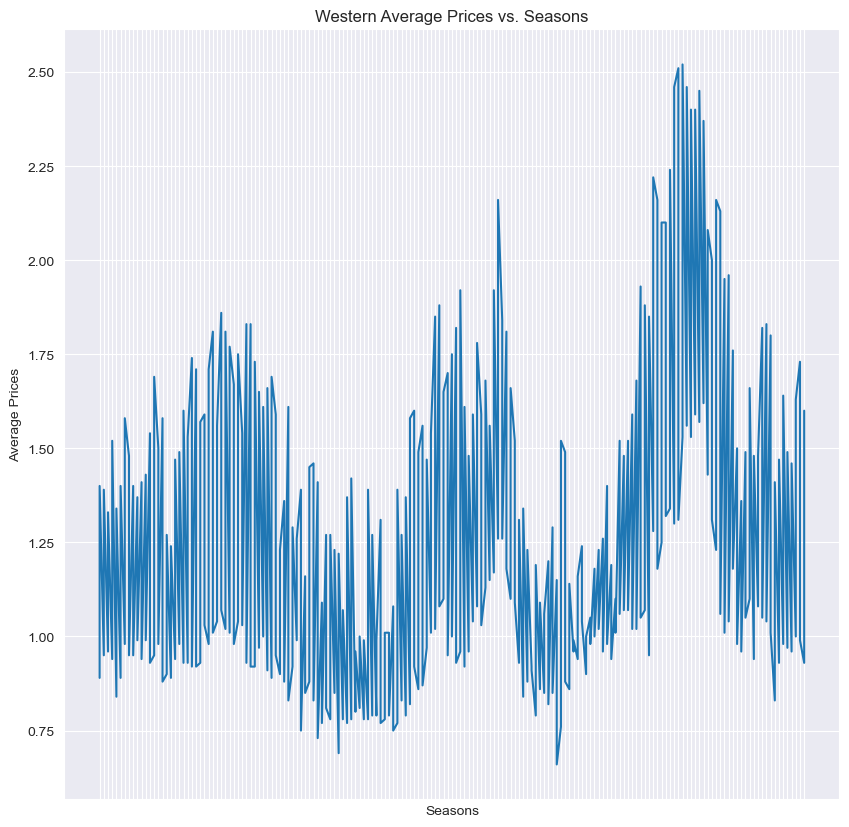

In [21]:
plt.figure(figsize = (10, 10))
plt.xticks(visible = False)
plt.title("Western Average Prices vs. Seasons")
plt.xlabel("Seasons")
plt.ylabel("Average Prices")
plt.plot(df_prophet_region['Date'], df_prophet_region['AveragePrice'])

> Plot of **average prices from the Western region over seasons** from the span of time from 2015-01-04 to 2018-03-25

In [22]:
df_prophet_region = df_prophet_region[['Date', 'AveragePrice']]

> **Filtering the data** to only include data from "Date" and "AveragePrice" columns. 

In [23]:
df_prophet_region = df_prophet_region.rename(columns = {'Date':'ds', 'AveragePrice':'y'})
df_prophet_region.head()

,ds,y
2755,2015-01-04,0.89
11881,2015-01-04,1.40
2754,2015-01-11,0.95
11880,2015-01-11,1.39
2753,2015-01-18,0.96


> **Rename the columns to "ds" and "y"** because those are the variables that Prophet expects as inputs.

In [29]:
r = Prophet()
r.fit(df_prophet_region)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


> **Initialize Prophet** by calling the Prophet() class then **fit the wanted data** to the class object using the .fit() method

In [26]:
new = r.make_future_dataframe(periods = 365)
newfore = r.predict(new)

C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


> **Use the .make_future_dataframe() method** with a period of 365 (number of days) to consolidate the data into a 'new' variable. **Use the .predict() method to make inferences** on 'new' and assign that to a 'newfore' variable.

### Visualizing the Predictions

Text(0.5, 1.0, 'Western Region Average Prices vs. Seasons')

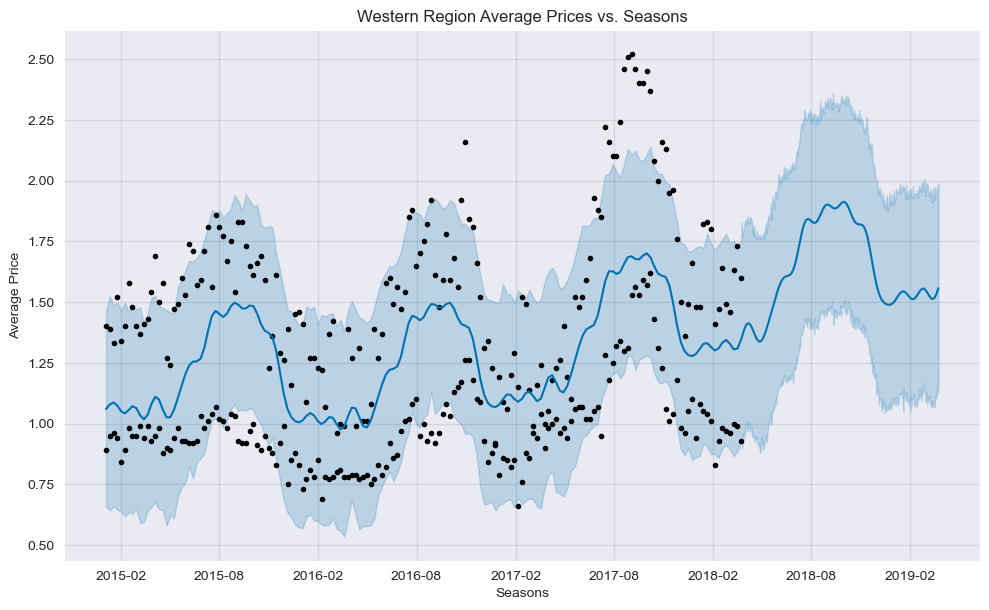

In [31]:
fig = r.plot(newfore, xlabel = 'Seasons', ylabel = 'Average Price')
plt.title("Western Region Average Prices vs. Seasons")

> **Plot of the future predictions of average prices from the Western region** over the span of time from 2015-01-04 to 2018-03-25

C:\Users\reday\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


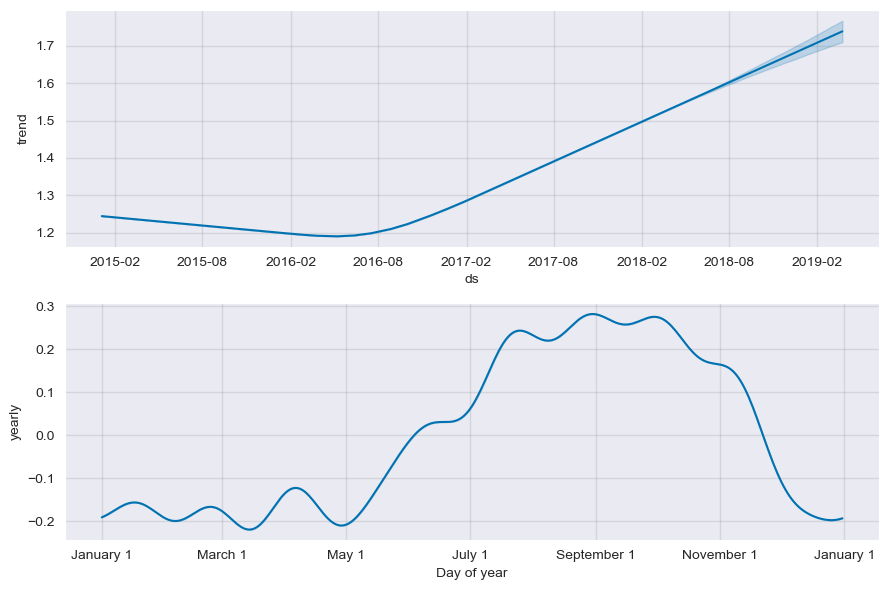

In [28]:
fig = r.plot_components(newfore)

> Plots of the components over time. The **top graph shows the general trend of the Average Price** of avocados as time passes, and the **bottom graph shows the annual trend of the price** of avocados every season. 